In [1]:
import librosa
import numpy as np
import seaborn as sns
import librosa.display
from constants import *
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
signal, _ = librosa.load("dataset/test/test_0.wav", mono=True, sr=SR)
print(signal.shape)
ipd.Audio(signal, rate=SR)

(234000,)


In [5]:
stft = librosa.stft(signal, n_fft=N_FFT, hop_length=HOP)[:-1]
print("STFT:", stft.shape)
istft = librosa.istft(stft, n_fft=N_FFT, hop_length=HOP)
print("Inv STFT", istft.shape)
magnitude = np.abs(stft)
print("Magnitude:", magnitude.shape)
print(f"Magnitude: {np.min(magnitude)}, {np.max(magnitude)}")
phase = np.angle(stft)
print("Phase:", phase.shape)
print(f"Phase: {np.min(phase)}, {np.max(phase)}")
db = librosa.amplitude_to_db(magnitude)
print("dB:", np.max(db), np.min(db))
ipd.Audio(istft, rate=SR)

STFT: (256, 3657)
Inv STFT (233984,)
Magnitude: (256, 3657)
Magnitude: 8.94707383736204e-08, 98.20565032958984
Phase: (256, 3657)
Phase: -3.1415858268737793, 3.141592502593994
dB: 39.842728 -40.157272


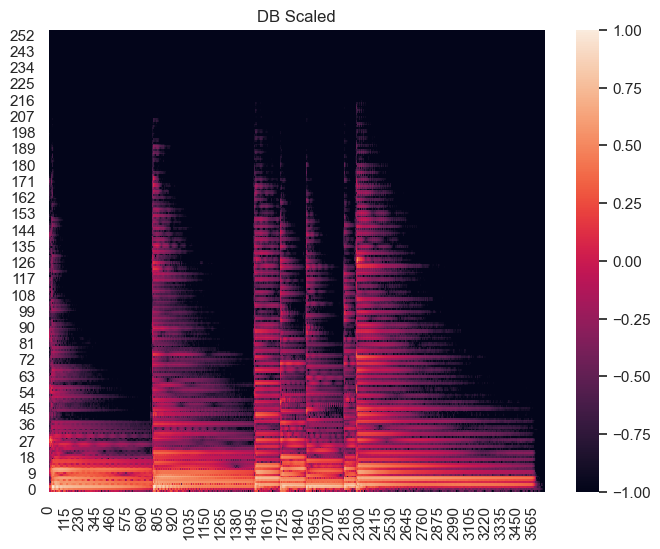

In [9]:
mini, maxi = np.min(db), np.max(db)
db_scaled = 2.0 * (db - mini) / (maxi - mini) - 1.0
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(db_scaled)
ax.invert_yaxis()
plt.title("DB Scaled")
plt.show()

In [10]:
db_restored = (db_scaled + 1.0) * (maxi - mini) / 2.0 + mini
print(np.max(db_restored), np.min(db_restored))
amplitude = librosa.db_to_amplitude(db_restored)
print(f"Magnitude: {np.min(magnitude)}, {np.max(magnitude)}")
print("Amplitude:", np.min(amplitude), np.max(amplitude))
restored_stft = amplitude * np.exp(1j * phase)
restored_audio = librosa.istft(restored_stft, n_fft=N_FFT, hop_length=HOP)
print(restored_audio.shape, np.min(restored_audio), np.max(restored_audio))
ipd.Audio(restored_audio, rate=SR)

39.842728 -40.157272
Magnitude: 8.94707383736204e-08, 98.20565032958984
Amplitude: 0.00982056 98.20563
(233984,) -0.97408324 0.9742174


In [12]:
signal_win = signal[:WINDOW_SAMPLE_LEN]
stft = librosa.stft(signal_win, n_fft=N_FFT, hop_length=HOP)[:-1]
print(stft.shape)

(256, 256)


In [13]:
WINDOW_SAMPLE_LEN

16320

In [26]:
OVERLAP = 2**8
OFFSET = WINDOW_SAMPLE_LEN - OVERLAP

In [39]:
num_windows = np.ceil((len(signal) - WINDOW_SAMPLE_LEN) /
                  (WINDOW_SAMPLE_LEN - OVERLAP) + 1)
num_windows = int(np.ceil(num_windows / 4) * 4)
print(num_windows)

16


In [40]:
for i in range(num_windows):
    start = i * OFFSET
    end = start + WINDOW_SAMPLE_LEN
    sig_window = signal[start:end]
    if len(sig_window) < WINDOW_SAMPLE_LEN:
        sig_window = np.pad(
            sig_window, (0, WINDOW_SAMPLE_LEN - len(sig_window)), mode="constant")

    stft = librosa.stft(sig_window, n_fft=N_FFT, hop_length=HOP)[:-1]
    magnitude = np.abs(stft)
    magnitude = np.expand_dims(magnitude, axis=0)
    phase = np.angle(stft)
    phase = np.expand_dims(phase, axis=0)
    db = librosa.amplitude_to_db(magnitude)
    db = np.expand_dims(db, axis=0)